## Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#For randomized data splitting
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# To check model performance
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# To visualize the decision tree

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

##--conda install pydot
##--conda install -c anaconda graphviz

## Dataset

In [3]:
heart = pd.read_csv('heart.csv')

In [4]:
heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

The dataset is fairly balanced.

In [9]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no null values.

In [19]:
heart.shape

(303, 14)

In [7]:
X= heart.drop(['target'], axis=1)
y = heart['target']

## Split the dataset

In [8]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=0)

In [10]:
len(X_test)

91

# CART model

In [36]:
dtree = DecisionTreeClassifier(criterion='gini')

In [37]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Predictions

In [38]:
#dtree_predictions= dtree.predict(X_test)
ytrain_predict = dtree.predict(X_train)
ytest_predict = dtree.predict(X_test)


## Model Evaluation

### AUC & ROC

AUC: 1.000


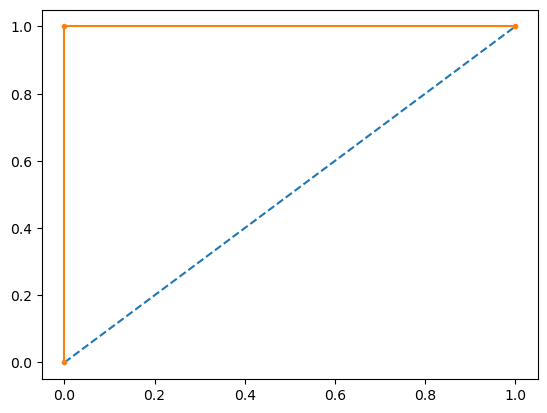

In [39]:
# AUC and ROC for the training data

# predict probabilities
probs = dtree.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.715


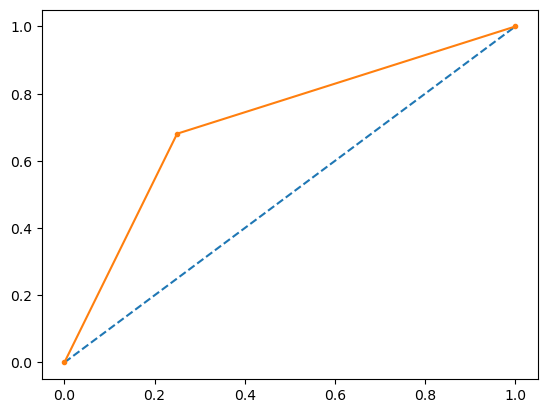

In [40]:
# AUC and ROC for the test data


# predict probabilities
probs = dtree.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Classification Report

In [41]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       118

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [42]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        44
           1       0.74      0.68      0.71        47

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91



### Confusion Matrix

In [43]:
confusion_matrix(y_train, ytrain_predict)

array([[ 94,   0],
       [  0, 118]], dtype=int64)

In [44]:
confusion_matrix(y_test, ytest_predict)

array([[33, 11],
       [15, 32]], dtype=int64)

### Model Score

In [45]:
dtree.score(X_train,y_train)

1.0

In [46]:
dtree.score(X_test,y_test)

0.7142857142857143

### Feature Importances

In [47]:
dtree.feature_importances_

array([0.0806071 , 0.05439406, 0.2588702 , 0.02730411, 0.05154408,
       0.02866931, 0.02258794, 0.07606578, 0.02077385, 0.13115204,
       0.04874881, 0.12481925, 0.07446346])

In [48]:
imp_df1 = pd.DataFrame(dtree.feature_importances_, columns=['Imp'], index=X_train.columns)
imp_df1['Imp'].sort_values()

exang       0.020774
restecg     0.022588
trestbps    0.027304
fbs         0.028669
slope       0.048749
chol        0.051544
sex         0.054394
thal        0.074463
thalach     0.076066
age         0.080607
ca          0.124819
oldpeak     0.131152
cp          0.258870
Name: Imp, dtype: float64

### Probabilities

In [41]:
ytrain_predict_prob = dtree.predict_proba(X_train)
ytest_predict_prob = dtree.predict_proba(X_test)

## Tree visualizing

In [25]:
train_char_label=['1','0']
print(list(X_train))

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [26]:
heart_dot_data = StringIO()
export_graphviz(dtree,out_file= heart_dot_data,feature_names=list(X_train), filled=True,class_names=train_char_label)
graph = pydot.graph_from_dot_data(heart_dot_data.getvalue())

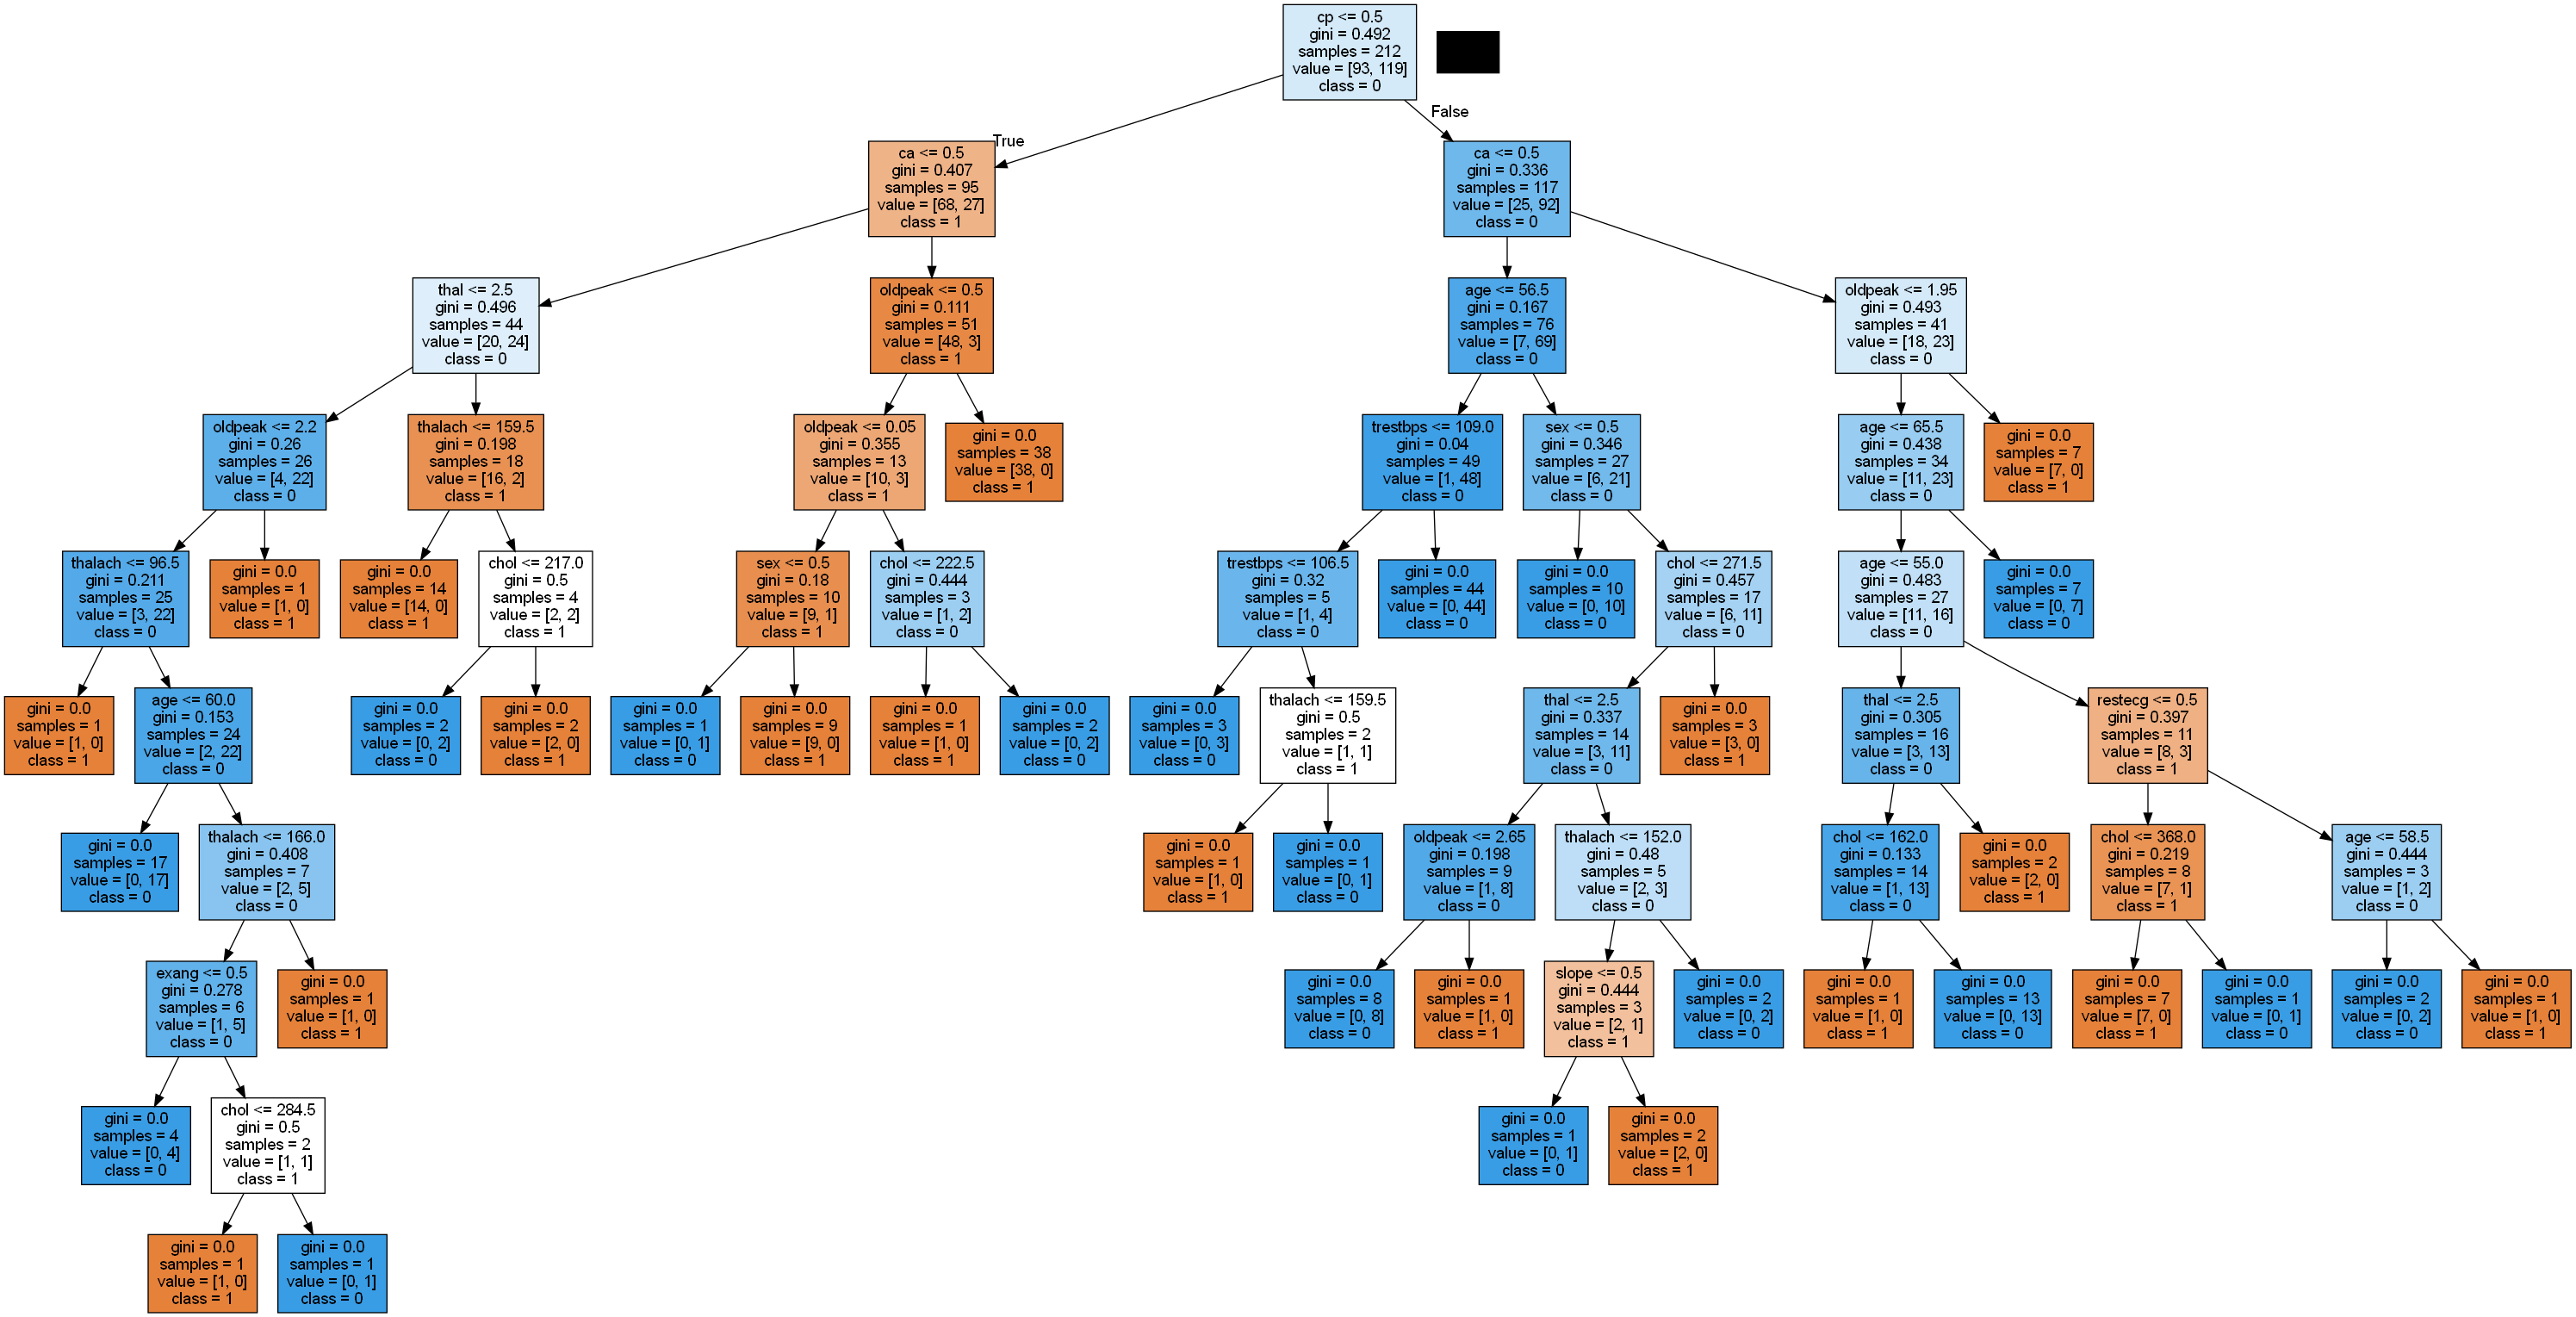

In [27]:
Image(graph[0].create_png())

# Regularized Model

In [11]:
reg_dtree = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=0)


In [12]:
reg_dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

## Predictions

In [13]:
#dtree_predictions= dtree.predict(X_test)
ytrain_predict = reg_dtree.predict(X_train)
ytest_predict = reg_dtree.predict(X_test)

## Model Evaluation

### AUC & ROC

AUC: 0.999


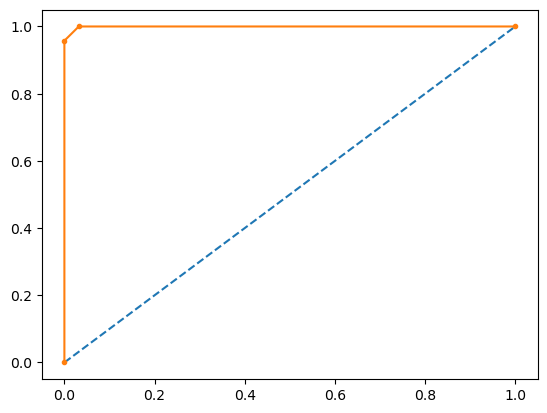

In [14]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dtree.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.758


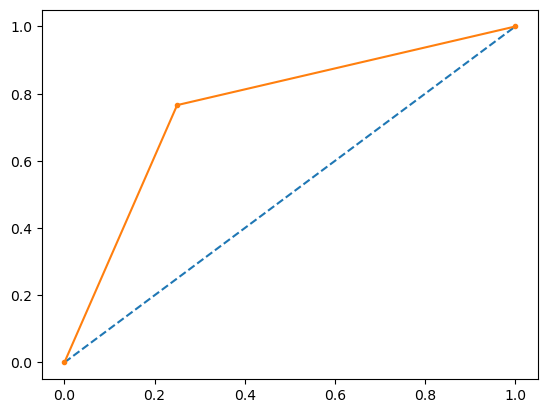

In [27]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dtree.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Classification Report

In [15]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        94
           1       0.98      1.00      0.99       118

    accuracy                           0.99       212
   macro avg       0.99      0.98      0.99       212
weighted avg       0.99      0.99      0.99       212



In [16]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        44
           1       0.77      0.77      0.77        47

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



### Confusion Matrix

In [17]:
confusion_matrix(y_train, ytrain_predict)

array([[ 91,   3],
       [  0, 118]], dtype=int64)

In [18]:
confusion_matrix(y_test, ytest_predict)

array([[33, 11],
       [11, 36]], dtype=int64)

### Model Score

In [20]:
reg_dtree.score(X_train,y_train)

0.9858490566037735

In [21]:
reg_dtree.score(X_test,y_test)

0.7582417582417582

### Feature Importances

In [56]:
reg_dtree.feature_importances_

array([0.02163381, 0.02393171, 0.40333197, 0.        , 0.        ,
       0.        , 0.01568322, 0.00215119, 0.        , 0.02633121,
       0.06310529, 0.26848301, 0.17534859])

In [30]:
imp_df =pd.DataFrame(reg_dtree.feature_importances_, columns=['Imp'], index=X_train.columns)
imp_df

,Imp
age,0.056346
sex,0.056416
cp,0.268492
trestbps,0.028319
chol,0.069979
fbs,0.029735
restecg,0.013516
thalach,0.049158
exang,0.021546
oldpeak,0.149242


### Probabilities

In [23]:
ytrain_predict_prob = reg_dtree.predict_proba(X_train)
ytest_predict_prob = reg_dtree.predict_proba(X_test)

## Tree visualizing

In [24]:
train_char_label=['1','0']
print(list(X_train))

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [25]:
heart_dot_data = StringIO()
export_graphviz(reg_dtree,out_file= heart_dot_data,feature_names=list(X_train), filled=True,class_names=train_char_label)
graph = pydot.graph_from_dot_data(heart_dot_data.getvalue())

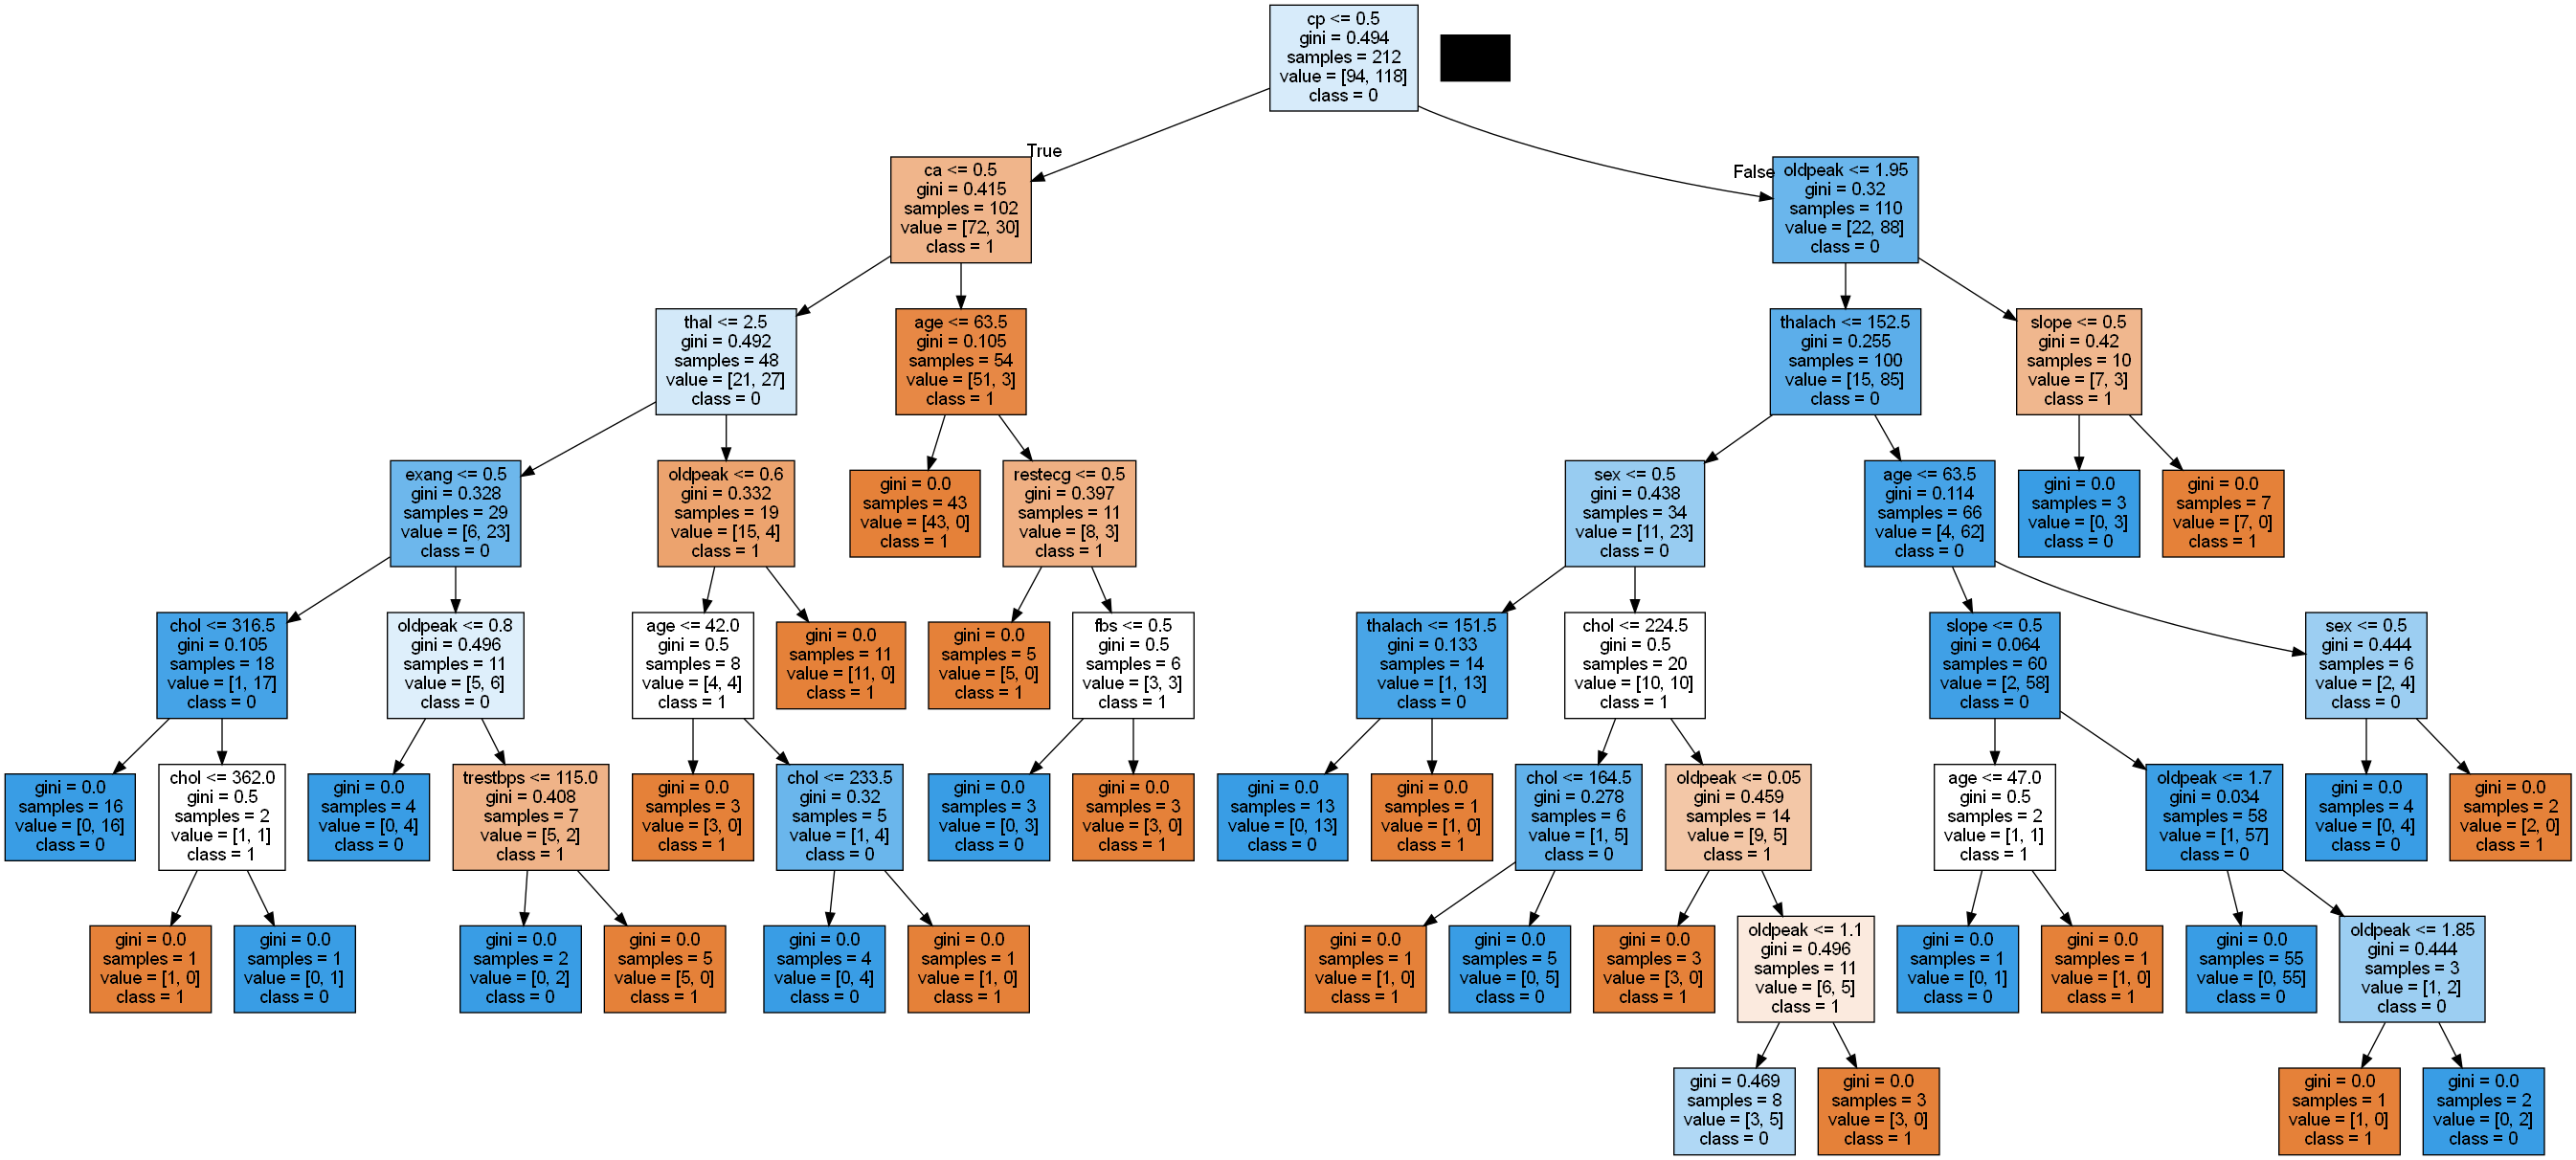

In [26]:
Image(graph[0].create_png())